# Classify Song Genres from Audio Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading ```"echonest-metrics"``` dataset

In [2]:
em_data = pd.read_json("echonest-metrics.json")
em_data[:5]

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


### Loading ```"fma-rock-vs-hiphop.csv"``` dataset

In [3]:
rh_data = pd.read_csv("fma-rock-vs-hiphop.csv")
rh_data[:5]

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [4]:
em_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [5]:
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [6]:
nan_df = rh_data[rh_data.isna().any(axis=1)]
nan_df

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17729,155063,320000,0,NaN,2017-03-24 19:40:43,NaN,283,3,Hip-Hop,"[21, 811]",...,NaN,1283,NaN,Attribution,1050,NaN,4,NaN,"['old school beats', '2017 free instrumentals'...",Been On
17730,155064,320000,0,NaN,2017-03-24 19:40:44,NaN,250,2,Hip-Hop,"[21, 811]",...,NaN,1077,NaN,Attribution,858,NaN,2,NaN,"['old school beats', '2017 free instrumentals'...",Send Me
17731,155065,320000,0,NaN,2017-03-24 19:40:45,NaN,219,3,Hip-Hop,"[21, 811]",...,NaN,1340,NaN,Attribution,1142,NaN,1,NaN,"['old school beats', '2017 free instrumentals'...",The Question
17732,155066,320000,0,NaN,2017-03-24 19:40:47,NaN,252,6,Hip-Hop,"[21, 811]",...,NaN,2065,NaN,Attribution,1474,NaN,3,NaN,"['old school beats', '2017 free instrumentals'...",Roy


In [7]:
print(rh_data.isnull().sum())

track_id             0
bit_rate             0
comments             0
composer         17568
date_created         0
date_recorded    15836
duration             0
favorites            0
genre_top            0
genres               0
genres_all           0
information      17252
interest             0
language_code    13645
license             20
listens              0
lyricist         17681
number               0
publisher        17682
tags                 0
title                0
dtype: int64


In [8]:
nan_df[["composer","date_recorded","information", "language_code", "lyricist", "publisher"]]

,composer,date_recorded,information,language_code,lyricist,publisher
0,NaN,2008-11-26 00:00:00,NaN,en,NaN,NaN
1,NaN,2008-11-26 00:00:00,NaN,en,NaN,NaN
2,NaN,NaN,NaN,en,NaN,NaN
3,NaN,NaN,NaN,en,NaN,NaN
4,Arc and Sender,2008-11-26 00:00:00,NaN,en,NaN,NaN
...,...,...,...,...,...,...
17729,NaN,NaN,NaN,NaN,NaN,NaN
17730,NaN,NaN,NaN,NaN,NaN,NaN
17731,NaN,NaN,NaN,NaN,NaN,NaN
17732,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
rh_data = rh_data.dropna(axis='columns')

In [10]:
print(rh_data.isnull().sum())

track_id        0
bit_rate        0
comments        0
date_created    0
duration        0
favorites       0
genre_top       0
genres          0
genres_all      0
interest        0
listens         0
number          0
tags            0
title           0
dtype: int64


In [11]:
rh_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_id      17734 non-null  int64 
 1   bit_rate      17734 non-null  int64 
 2   comments      17734 non-null  int64 
 3   date_created  17734 non-null  object
 4   duration      17734 non-null  int64 
 5   favorites     17734 non-null  int64 
 6   genre_top     17734 non-null  object
 7   genres        17734 non-null  object
 8   genres_all    17734 non-null  object
 9   interest      17734 non-null  int64 
 10  listens       17734 non-null  int64 
 11  number        17734 non-null  int64 
 12  tags          17734 non-null  object
 13  title         17734 non-null  object
dtypes: int64(8), object(6)
memory usage: 1.9+ MB


In [12]:
rh_data.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,listens,number,tags,title
0,135,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,1832,0,[],Father's Day
1,136,256000,1,2008-11-26 01:43:35,509,0,Rock,"[45, 58]","[58, 12, 45]",1948,1498,0,[],Peel Back The Mountain Sky
2,151,192000,0,2008-11-26 01:44:55,192,0,Rock,[25],"[25, 12]",701,148,4,[],Untitled 04
3,152,192000,0,2008-11-26 01:44:58,193,0,Rock,[25],"[25, 12]",637,98,11,[],Untitled 11
4,153,256000,0,2008-11-26 01:45:00,405,5,Rock,[26],"[26, 12]",354,424,2,[],Hundred-Year Flood


In [13]:
rh_data.drop(['tags','comments','date_created','favorites','duration','interest','listens','number'], axis=1, inplace =True)

In [14]:
rh_data.head()

,track_id,bit_rate,genre_top,genres,genres_all,title
0,135,256000,Rock,"[45, 58]","[58, 12, 45]",Father's Day
1,136,256000,Rock,"[45, 58]","[58, 12, 45]",Peel Back The Mountain Sky
2,151,192000,Rock,[25],"[25, 12]",Untitled 04
3,152,192000,Rock,[25],"[25, 12]",Untitled 11
4,153,256000,Rock,[26],"[26, 12]",Hundred-Year Flood


In [15]:
em_data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [16]:
rh_data['track_id'].count()

17734

In [17]:
em_data['track_id'].count()

13129

In [18]:
trial_df = em_data.merge(rh_data, on='track_id', how='left')
trial_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,genre_top,genres,genres_all,title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,256000.0,Hip-Hop,[21],[21],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,256000.0,Hip-Hop,[21],[21],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,256000.0,Hip-Hop,[21],[21],This World
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,NaN,NaN,NaN,NaN,NaN
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,256000.0,Hip-Hop,[21],[21],Street Music


In [19]:
trial_df['track_id'].count()

13129

In [20]:
print(trial_df.isnull().sum())

track_id               0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
bit_rate            8327
genre_top           8327
genres              8327
genres_all          8327
title               8327
dtype: int64


In [21]:
final_df = trial_df.dropna()

In [22]:
print(final_df.isnull().sum())

track_id            0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
bit_rate            0
genre_top           0
genres              0
genres_all          0
title               0
dtype: int64


In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 13101
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   bit_rate          4802 non-null   float64
 10  genre_top         4802 non-null   object 
 11  genres            4802 non-null   object 
 12  genres_all        4802 non-null   object 
 13  title             4802 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 562.7+ KB


In [24]:
final_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,genre_top,genres,genres_all,title
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,256000.0,Hip-Hop,[21],[21],Food
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,256000.0,Hip-Hop,[21],[21],Electric Ave
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,256000.0,Hip-Hop,[21],[21],This World
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,256000.0,Hip-Hop,[21],[21],Street Music
13,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,256000.0,Rock,[26],"[26, 12]",Hundred-Year Flood


In [25]:
final_df['genre_top'].unique()

array(['Hip-Hop', 'Rock'], dtype=object)

In [26]:
final_df.dtypes

track_id              int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
speechiness         float64
tempo               float64
valence             float64
bit_rate            float64
genre_top            object
genres               object
genres_all           object
title                object
dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
final_df["genre_code"] = lb_make.fit_transform(final_df["genre_top"])
final_df[["genre_top", "genre_code"]].head()

C:\Users\SEBIN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,genre_top,genre_code
0,Hip-Hop,0
1,Hip-Hop,0
2,Hip-Hop,0
4,Hip-Hop,0
13,Rock,1


In [28]:
final_df.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,bit_rate,genre_top,genres,genres_all,title,genre_code
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,256000.0,Hip-Hop,[21],[21],Food,0
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,256000.0,Hip-Hop,[21],[21],Electric Ave,0
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,256000.0,Hip-Hop,[21],[21],This World,0
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,256000.0,Hip-Hop,[21],[21],Street Music,0
13,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,256000.0,Rock,[26],"[26, 12]",Hundred-Year Flood,1


In [29]:
Features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'speechiness', 'tempo', 'valence']
Target = ['genre_code']

In [30]:
X = final_df[Features]
y = final_df[Target]

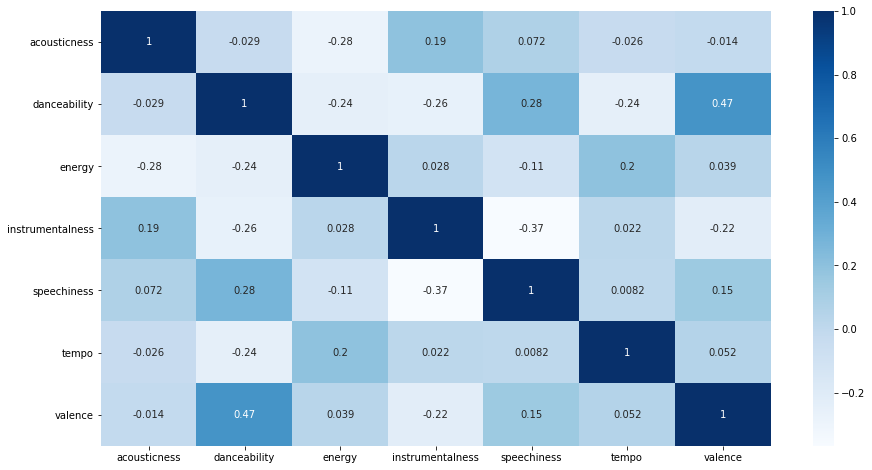

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(X.corr(),cmap='Blues',annot=True)

In [32]:
X.describe()

,acousticness,danceability,energy,instrumentalness,speechiness,tempo,valence
count,4.802000e+03,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000,4802.000000
mean,4.870600e-01,0.436556,0.625126,0.604096,0.104877,126.687944,0.453413
std,3.681396e-01,0.183502,0.244051,0.376487,0.145934,34.002473,0.266632
min,9.491000e-07,0.051307,0.000279,0.000000,0.023234,29.093000,0.014392
25%,8.351236e-02,0.296047,0.450757,0.164972,0.036897,98.000750,0.224617
50%,5.156888e-01,0.419447,0.648374,0.808752,0.049594,124.625500,0.446240
75%,8.555765e-01,0.565339,0.837016,0.915472,0.088290,151.450000,0.666914
max,9.957965e-01,0.961871,0.999768,0.993134,0.966177,250.059000,0.983649


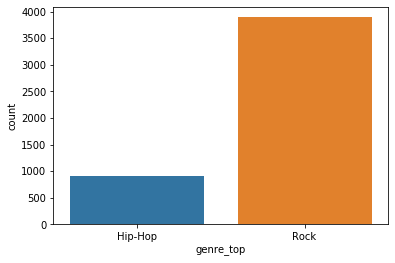

In [33]:
ax = sns.countplot(x="genre_top", data=final_df)

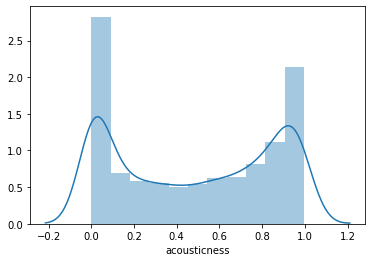

In [34]:
ax = sns.distplot(X['acousticness'])

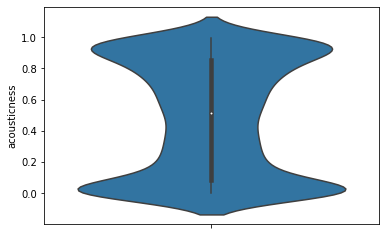

In [35]:
ax = sns.violinplot(x = 'acousticness', data=X, orient='v')

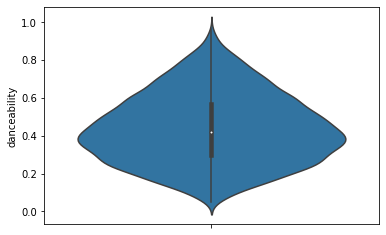

In [36]:
ax = sns.violinplot(x = 'danceability', data=X, orient='v')

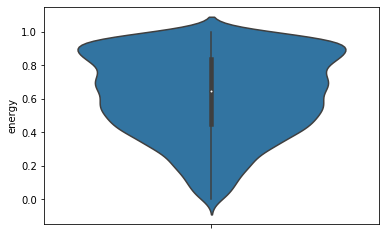

In [37]:
ax = sns.violinplot(x = 'energy', data=X, orient='v')

In [38]:
ax = sns.violinplot(x = X, y = range(0,1), data=X, orient='v')

ValueError: could not broadcast input array from shape (4802,7) into shape (4802)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

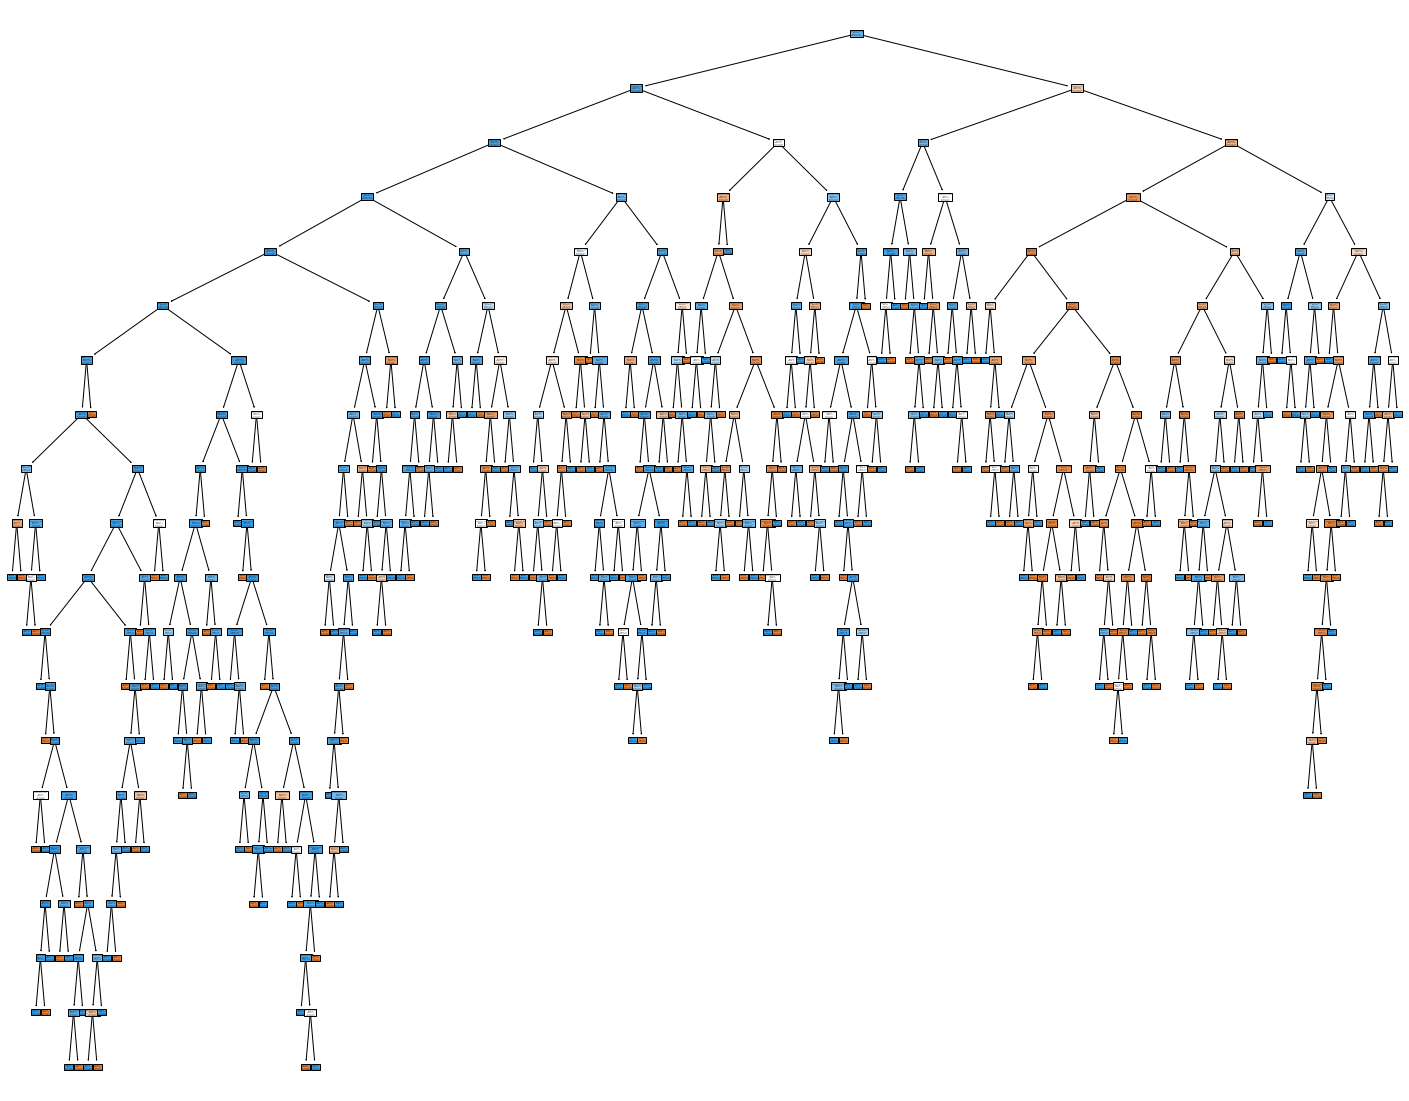

In [43]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
p = tree.plot_tree(dt_model, 
                   feature_names=Features,  
                   class_names=final_df['genre_top'],
                   filled=True)